<a href="https://colab.research.google.com/github/CarlVillachica/Algoritmos-Gen-ticos/blob/main/tareaIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reconocedor de digitos a mano usando una red convolucional
Base de datos usada de http://yann.lecun.com/exdb/mnist/ (MNIST)

In [67]:
%tensorflow_version 2.x
#sirve para setear la version de tensorflow en colab

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

#Uso de python , tensorflow y keras

print('Se cargo de manera correcta')

Se cargo de manera correcta


In [69]:
%load_ext tensorboard
!rm -rf ./.logs/
#cargar debugger y limpiar cache

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [70]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
#cargando los datos

In [71]:
print('Se cargo de manera correcta')

Se cargo de manera correcta


In [72]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
#se normalizaron los datos de [0,255] a [0,1] 

Usando el modelo secuencial de Keras con 4 capas:

In [73]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [74]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [75]:

log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5221 - accuracy: 0.9220 - val_loss: 0.3313 - val_accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.9548 - val_loss: 0.2736 - val_accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9613 - val_loss: 0.2348 - val_accuracy: 0.9646
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2383 - accuracy: 0.9635 - val_loss: 0.2422 - val_accuracy: 0.9595
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2254 - accuracy: 0.9645 - val_loss: 0.2111 - val_accuracy: 0.9696
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2137 - accuracy: 0.9656 - val_loss: 0.2050 - val_accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2061 - accuracy: 0.9671 - val_loss: 0.2002 - val_accuracy:

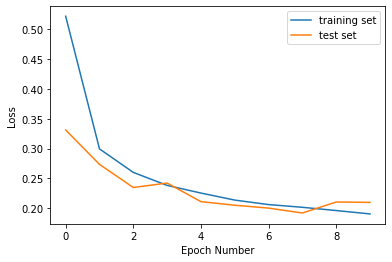

In [76]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

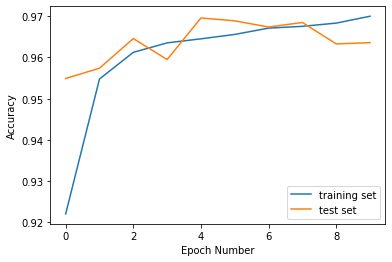

In [77]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [78]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [80]:
print('entramiento_perdida: ', train_loss)
print('entrenamiento_precision: ', train_accuracy)

entramiento_perdida:  0.18514005839824677
entrenamiento_precision:  0.970633327960968


In [79]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)


In [81]:
print('contra el test')
print('test perdidas: ', validation_loss)
print('test_precision: ', validation_accuracy)

contra el test
test perdidas:  0.20979033410549164
test_precision:  0.9635999798774719


Guardar modelo para probar

In [83]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [85]:
loaded_model = tf.keras.models.load_model(model_name)

In [86]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [87]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [89]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.590817e-06,6.045622e-06,5.858855e-05,1.983037e-04,4.823664e-08,0.000010,1.498364e-10,9.996662e-01,1.097947e-06,5.462491e-05
1,1.085953e-03,1.429236e-02,7.470852e-01,1.536262e-01,2.924316e-07,0.021848,2.041784e-02,2.517276e-05,4.161629e-02,2.467325e-06
2,1.622581e-05,9.846941e-01,5.189693e-04,2.430072e-04,1.611526e-03,0.000264,8.715715e-03,1.174053e-03,2.742307e-03,2.018680e-05
3,9.971795e-01,2.523067e-06,4.289198e-04,6.404003e-06,2.430202e-05,0.000033,2.344348e-05,1.979411e-03,6.685245e-07,3.222356e-04
4,8.390636e-06,8.025125e-07,2.175989e-06,2.089835e-07,9.968382e-01,0.000005,9.476248e-07,5.070179e-04,1.587609e-06,2.635451e-03
...,...,...,...,...,...,...,...,...,...,...
9995,2.909114e-06,2.378883e-04,9.989825e-01,6.943448e-04,3.752070e-12,0.000005,8.944117e-07,2.449099e-05,5.234021e-05,3.270065e-10
9996,2.780205e-05,6.851523e-04,1.603524e-04,8.370679e-01,6.037611e-08,0.161506,1.148471e-06,1.313743e-05,1.805080e-05,5.205725e-04
9997,3.768686e-07,3.904604e-05,6.037119e-08,1.087503e-07,9.995302e-01,0.000002,3.768018e-07,6.119119e-05,1.491106e-04,2.177666e-04
9998,2.463167e-04,2.360181e-05,5.112557e-07,1.418748e-04,1.146598e-07,0.996526,1.584904e-03,2.943690e-06,1.473236e-03,5.827703e-07


In [90]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


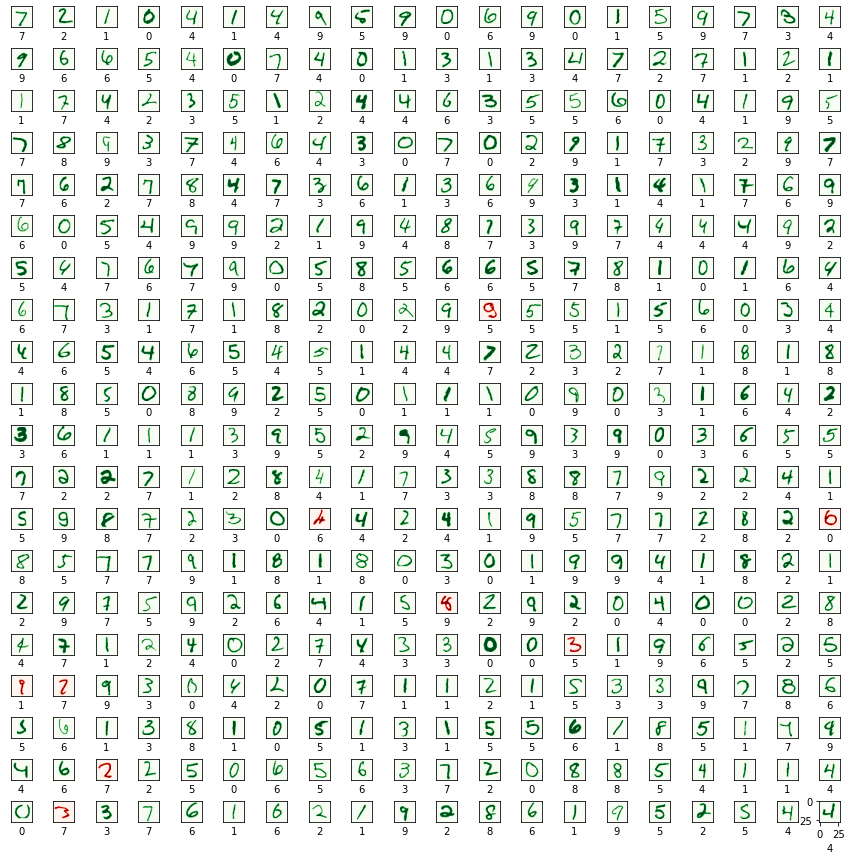

In [98]:
numbers_to_display = 400
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Matriz de confusion

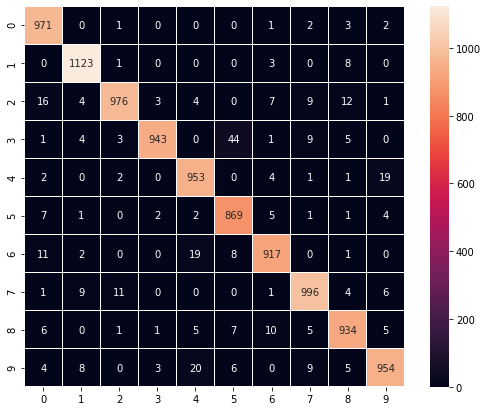

In [96]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()